# Lab Work 2: Text Processing: Preparation of texts

## 1. Loading the data and using CountVectorize

Download and import the list of text files in [sherlock.zip](https://www.ili.fh-aachen.de/goto_elearning_file_815003_download.html). <br>
These represent Sherlock Holmes stories by [Arthur Conan Doyle](https://en.wikipedia.org/wiki/Arthur_Conan_Doyle).

In [2]:
filename = [r"./Sherlock/Sherlock.txt", 
             r"./Sherlock/Sherlock_blanched.txt",
             r"./Sherlock/Sherlock_black.txt",
             r"./Sherlock/Sherlock_blue.txt",
             r"./Sherlock/Sherlock_card.txt"]

Now we create a [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). <br> The parameter given tells the CountVectorizer that its methods shall operate on a list of filenames.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(input="filename")

### Using the CountVectorizer, a Bag of Words is generated, together with all features names:

In [4]:
BoWords = vectorizer.fit_transform(filename)
features = vectorizer.get_feature_names_out()

### We now check the following three categories of the text files:
##### Total number of different words

The number of different words per document are saved in the `different_words_per_document` list. <br> A boolean array is then used to identify the words with a count greater than 0, effectively counting the different words for every document. <br> <br> 
Using the [`get_feature_names_out()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.get_feature_names_out) method, a list of all different words is returned, the length of which is the **total number of different words**.

In [5]:
different_words_per_document = [(BoWords[i] > 0).sum() for i in range(BoWords.shape[0])]

for i, num_words in enumerate(different_words_per_document):
    print(f"{i + 1}. {num_words} different words")

total_different_words = len(features)
#print(features)
print(f"\nTotal number of different words: {total_different_words}")


1. 7952 different words
2. 1727 different words
3. 1791 different words
4. 1753 different words
5. 1781 different words

Total number of different words: 8879


##### Total number of words per document

In [6]:
words_per_document = BoWords.sum(axis=1)
for i, count in enumerate(words_per_document):
    print(f"{i + 1}. {count.item()} words")

1. 107416 words
2. 7258 words
3. 7775 words
4. 7497 words
5. 8242 words


##### Total number of occurrences of each word

In [7]:
total_occurrences_per_word = BoWords.sum(axis=0)

# A dictionary with the results in the form word(key): number of occurrences(value)
dict = {word: total_occurrences_per_word[0, i].item() for i, word in enumerate(features)}

for word, occurrences in dict.items():
    print(f"{word}: {occurrences} occurrences")


117: 2 occurrences
12: 1 occurrences
12s: 1 occurrences
13: 1 occurrences
131: 2 occurrences
13th: 1 occurrences
14th: 1 occurrences
15: 1 occurrences
16: 2 occurrences
1840: 1 occurrences
1872: 1 occurrences
1881: 1 occurrences
1883: 10 occurrences
1884: 3 occurrences
1887: 1 occurrences
1888: 1 occurrences
1892: 1 occurrences
1893: 1 occurrences
1894: 4 occurrences
1895: 1 occurrences
18th: 1 occurrences
1900: 1 occurrences
1901: 2 occurrences
1903: 1 occurrences
1904: 1 occurrences
1926: 1 occurrences
1st: 2 occurrences
20th: 1 occurrences
22: 1 occurrences
221b: 1 occurrences
22d: 1 occurrences
22nd: 2 occurrences
23rd: 1 occurrences
249: 1 occurrences
26: 1 occurrences
30: 5 occurrences
3rd: 1 occurrences
426: 1 occurrences
427: 3 occurrences
45: 2 occurrences
46: 2 occurrences
50: 1 occurrences
6d: 1 occurrences
6th: 1 occurrences
7s: 1 occurrences
83: 2 occurrences
87: 1 occurrences
95: 7 occurrences
97: 1 occurrences
aback: 3 occurrences
abandon: 7 occurrences
abandoned: 1 occu

Based on both the `total number of words` and the `number of different words` for each document , it can be assumed that the first document has a different type of content than the rest. <br> <br>
**Upon further inspection, *the first document is a collection of stories*, whereas *the other 4 documents are single short stories*.**

## 2. Determining words with the highest occurrence

This is done in three steps, since the `vectorizer.vocabulary_` is organized as a dictonary with *the value indicating the position of the word in the array*. <br>

1. Find out the highest count of a word
2. Find out the position of this count
3. Find out the word at this position

Firstly, we need to find out what the highest number of occurrences for a word is.

In [8]:
total_occurrences_per_word.max()

7975

After defining the maximum occurrence count for a single word, we need to determine the position of the word in the `total_occurrences_per_word` list.

In [9]:
total_occurrences_per_word.argmax()

7921

Using $\max f(x)$ returns the maximum value of $\operatorname{f}(x)$, whereas $\argmax(x)$ returns the first value of $\operatorname{x}$ at which this maximum is attained. <br> While it is a more concise way to find the position of the maximum value, this implementation neglects multiple occurrences where this value is reached.

#### Alternatively, creating a dataframe with `pandas` is a more efficient way to satisfy more sophisticated filtering criteria.

E.g. Top `N` most/least frequent words, words that begin with a specific letter, numbers, etc.

In [10]:
import pandas as pd

bow_df = pd.DataFrame(BoWords.toarray(), columns=features)
bow_df

,117,12,12s,13,131,13th,14th,15,16,1840,...,yourselves,youth,youthful,youths,yoxley,zealous,zenith,zest,zigzag,zoo
0,0,1,0,1,2,1,1,1,2,1,...,1,5,1,0,7,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


The following code utilizes a **dataframe** to get a list of the top 10 most frequently used words with *5 or more letters*.

In [11]:
top_words_count = bow_df.sum(axis=0).sort_values(ascending=False)
top_words_count = top_words_count[top_words_count.index.str.len() >= 5].iloc[:10]

top_words_count

which      938
holmes     890
there      715
would      528
could      430
should     276
watson     249
before     218
about      211
nothing    202
dtype: int64

/tmp/ipykernel_218962/4025387527.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_words_count.index, y=top_words_count.values, palette="magma")
/tmp/ipykernel_218962/4025387527.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


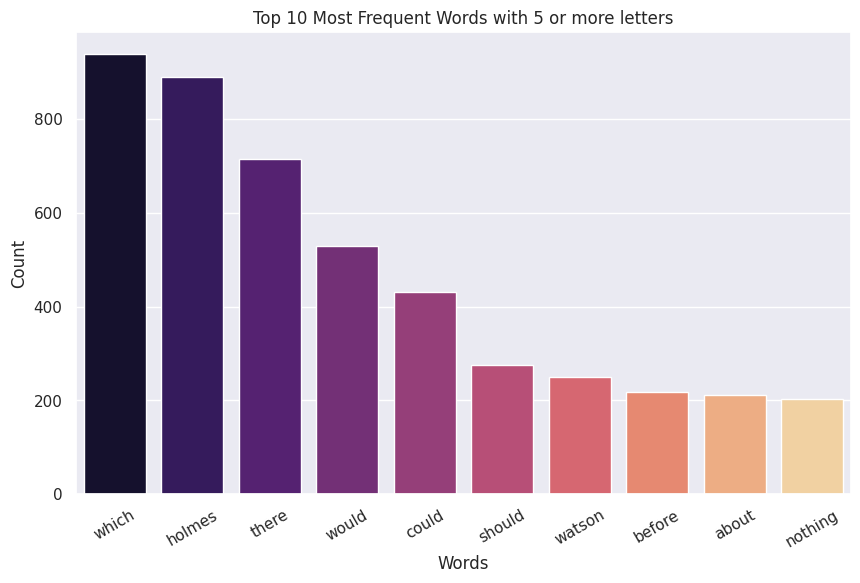

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top_words_count.index, y=top_words_count.values, palette="magma")
ax.set(xlabel='Words', ylabel='Count', title="Top 10 Most Frequent Words with 5 or more letters")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30) 

plt.show()

Another example is to have a list with the following criteria:
* The **top 10** most frequent words
* which start with the letter **h**
* and have **5 or more** letters

In [13]:
top_h_words = bow_df.loc[:, bow_df.columns.str.startswith('h')].sum(axis=0).sort_values(ascending=False)
top_h_words = top_h_words[top_h_words.index.str.len() >= 5].iloc[:10]

top_h_words

holmes     890
house      199
heard      127
hopkins    112
however    101
himself     96
hands       96
hardly      53
having      46
husband     46
dtype: int64

# 3. Reducing the number of dimensions with stop words, ngrams and document frequencies
The feature space is vast with nearly 9000 dimensions. Hence we should try to reduce the number of dimensions by:

* using words with a *minimal document frequency* **min_df**
* removing:
    * *stop words* *('a', 'and', 'the')* as they offer little to no value for the classification  
    * words that exceed the *maximum document frequency* **max_df**

A concise explanation about document frequencies can be found [here](https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer).

**Experiment with the values of min_df and max_df and see how the size of the vocabulary is changing.**

All three options have been implemented individually to determine how they affect the feature space. <br> <br>
**`Vectorizer34`** implemenets a combination of the aforementioned options.

### 3.1 Removing **stop words**

In [14]:
vectorizer31 = CountVectorizer(input="filename", stop_words="english")
new_words = vectorizer31.fit_transform(filename)
len(vectorizer31.vocabulary_)
#vectorizer2.vocabulary_

8601

After having removed all english stop words the feature space shrinks to about 8600 dimensions.

### 3.2 Filtering through **min_df** and **max_df**

In [15]:
vectorizer32 = CountVectorizer(input="filename", min_df=2)
new_words = vectorizer32.fit_transform(filename)
len(vectorizer32.vocabulary_)

3371

After having set exemplary values for **min_df** and **max_df** to ignore terms that appear *in less than 2 documents and more than 4 documents*, the feature space shrinks to 2947 spaces.

### 3.3 Adjusting the **N-gram range**

In [16]:
vectorizer33 = CountVectorizer(input="filename", ngram_range=(1, 1))
new_words = vectorizer33.fit_transform(filename)
len(vectorizer33.vocabulary_)

8879

After having set the **N-gram range** to include only unigrams there is an insignicant difference to the feature space.

### 3.4 Implementing all three options

In [17]:
vectorizer34 = CountVectorizer(input="filename", stop_words="english", ngram_range=(1,2), min_df=2, max_df=0.5)
new_words = vectorizer34.fit_transform(filename)
len(vectorizer34.vocabulary_)

5383

This implementation of `CountVectorizer` combines all parameters. <br> <br> In this code snippet the highest count of a word in the new feature space of `vectorizer34` has been calculated and its position determined through a `numpy` method. <br> <br>
English stop words have been filtered, for a good balance between capturing context and avoiding sparsity, both unigrams and bigrams have been included.
Terms that appear in less than 2 documents and those that appear in more than 50 of the documents have been ignored, reducing the dimensions to 5383. 

The following loop checks if the index of the current word in the vocabulary matches the index where the highest count of any word, which has occurred in the document-term matrix, and prints the highest count and the corresponding word.

In [18]:
import numpy as np

highest_count_of_word = new_words.sum(axis = 0).max()
pos = np.where(new_words.sum(axis = 0) == highest_count_of_word)

for key, value in vectorizer34.vocabulary_.items():
    if value == pos[1][0]:
        print(highest_count_of_word, key)

129 lestrade


##### To determine the top 20 most frequently used words in the filtered feature space, we use a dataframe as follows:

/tmp/ipykernel_218962/1976526142.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=top10_words.values, y=top10_words.index, palette="flare")


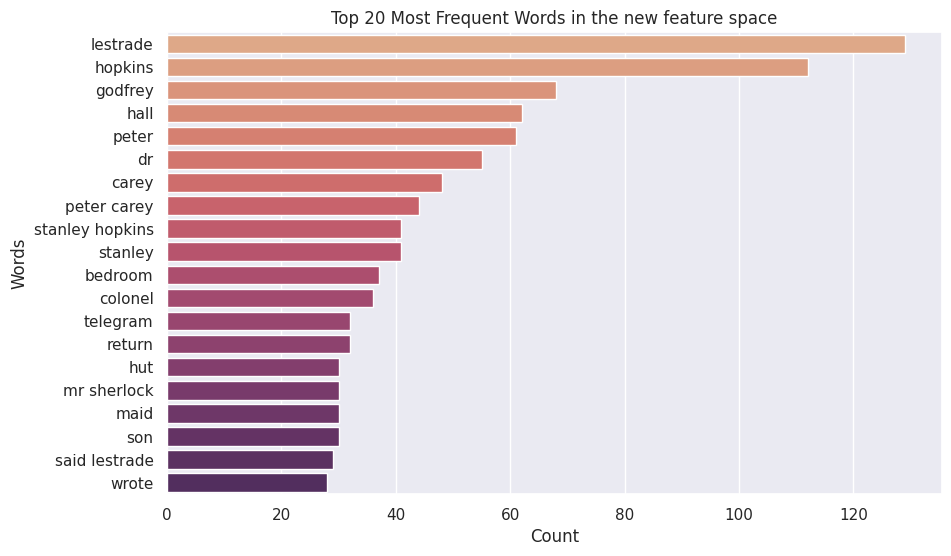

In [19]:
new_words_df = pd.DataFrame(new_words.toarray(), columns=vectorizer34.get_feature_names_out())
top10_words = new_words_df.sum(axis=0).sort_values(ascending=False).iloc[:20]

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

ax2 = sns.barplot(x=top10_words.values, y=top10_words.index, palette="flare")
ax2.set(xlabel='Count', ylabel='Words', title="Top 20 Most Frequent Words in the new feature space")

plt.show()

# 4. Rescaling the data using term frequency and inverse document frequency
**Term frequency** is the *number of occurences of a term (word) $t$ in a document $d$.*

$\operatorname{tf}(t, d) = f_{t, d}$ 

Sometimes $\operatorname{tf}$ gets normalized to the length of $d$. <br> <br>
**Inverse document frequency** $\operatorname{idf}$ measures *the amount of information a term $t$ carries.* Rare occurences of $t$ lead to a high amount of common information occurence and thus to a low amount of information. The $\operatorname{idf}$ is computed as follows:

$\text{idf}(t) = \log{\frac{1 + n}{1+\text{df}(t)}} + 1$

where $n$ is the total number of documents and $\text{df}(t)$ is the number of documents that contain the term $t$. Hence, the $\operatorname{tf-idf}$ is *the product of the two terms:*

$\text{tf-idf(t,d)}=\text{tf(t,d)} \cdot \text{idf(t)}$

scikit-learn supports this in the `TfidfTransformer`, when using the following parameters: `TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)`. Refer to the scikit documentation for the parameter sets and how this changes the formula.

Combining the Bag of Words and tf-idf can be done using the [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) as follows:

### 4.1 Creating the tf-idf dataset
<br>
The dataset considers both unigrams and bigrams, ignoring terms that appear in less than 30 % of the documents and those that appear in more than 4 documents. English stop words have been ignored.

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(input="filename", stop_words="english", ngram_range=(1,2), min_df=0.3, max_df=4)
X_tfidf_train = tfidf_vectorizer.fit_transform(filename[1:])

### 4.2 Finding the maximum value for each of the features in the dataset

In [120]:
X_tfidf_train.toarray().shape

(4, 1499)

In [124]:
max_value = X_tfidf_train.max(axis=0).toarray().ravel() # max per item in 1D array
sorted_by_tfidf = max_value.argsort() # indices in sorted order
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

print("Features with lowest tf-idf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))
print("\n")
print("tf-idf values:\n{}".format(max_value[sorted_by_tfidf[:20]]))
print("\n")
print("Features with highest tf-idf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))
print("\n")
print("tf-idf values:\n{}".format(max_value[sorted_by_tfidf[-20:]]))

Features with lowest tf-idf:
['endeavoured' 'doyle' 'intention' 'arthur conan' 'arthur' 'truth' 'conan'
 'sir arthur' 'strode' 'holmes adventure' 'valuable' 'approached' 'caused'
 'conan doyle' 'leaning' 'earth' 'uniform' 'printed' 'seat' 'marks']


tf-idf values:
[0.00816891 0.00816891 0.00816891 0.00816891 0.00816891 0.00816891
 0.00816891 0.00816891 0.00816891 0.00816891 0.00816891 0.00816891
 0.00816891 0.00816891 0.00816891 0.00915126 0.00915126 0.00915126
 0.00915126 0.00915126]


Features with highest tf-idf: 
['night' 'friend' 'sea' 'time' 'like' 'baker' 'mary' 'know' 'day' 'little'
 'stone' 'house' 'hat' 'sir' 'mr' 'old' 'miss' 'man' 'said' 'holmes']


tf-idf values:
[0.13744935 0.13887154 0.14208453 0.14215334 0.14215334 0.14300525
 0.14694715 0.16075972 0.16459861 0.17537424 0.18769439 0.18788503
 0.20460328 0.21239177 0.23689852 0.23689852 0.26538655 0.28936706
 0.31421218 0.40511388]


### 4.4 Sum and maximum of tf-idf per word

In [138]:
X_tfidf_train_df = pd.DataFrame(X_tfidf_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
max_tfidf = X_tfidf_train_df.max(axis=0).sort_values(ascending=False)[:10]
sum_tfidf = X_tfidf_train_df.sum(axis=0).sort_values(ascending=False)[:10]

print("Sum of tf-idf per word:\n{}".format(sum_tfidf), "\n")
print("Maximum of tf-idf per word:\n{}".format(max_tfidf))

Sum of tf-idf per word:
said      1.031124
holmes    1.028914
man       0.977909
mr        0.528993
sir       0.504487
little    0.435084
house     0.416617
know      0.390103
face      0.379606
case      0.377269
dtype: float64 

Maximum of tf-idf per word:
holmes    0.405114
said      0.314212
man       0.289367
miss      0.265387
mr        0.236899
old       0.236899
sir       0.212392
hat       0.204603
house     0.187885
stone     0.187694
dtype: float64


### 4.5 Example for a normalized row sum
<br>
To correctly normalize, the L2 norm should ideally be 1. <br>
Normalization is done by selecting the first row of the dataframe, calculating the sum of its elements and then the square root of the sum, as follows:

In [141]:
tfidf_normalized = np.sqrt(np.sum(X_tfidf_train_df.iloc[0, :] ** 2))
print("Normalized tf-idf for document 1:\n{}".format(tfidf_normalized))

Normalized tf-idf for document 1:
1.0000000000000004
